In [1]:
from scipy import *
import numpy as np
import WLanalysis
from matplotlib import pyplot

In [57]:
z_arr = arange(0.5,3,0.5)
eb_dir = 'stats_avg/output_eb_5000_s4/'

###### power spectrum
psI = array( [load(eb_dir+'ALL_igalXigal_z{0}_z{0}_10k.npy'.format(iz)) for iz in z_arr])
psN = array( [load(eb_dir+'ALL_galXgal_z{0}_z{0}_10k.npy'.format(iz)) for iz in z_arr])

psI5ka = array( [load(eb_dir+'ALL_igalXigal_z{0}_z{0}_5ka.npy'.format(iz)) for iz in z_arr])
psN5ka = array( [load(eb_dir+'ALL_galXgal_z{0}_z{0}_5ka.npy'.format(iz)) for iz in z_arr])

##### 1d PDF
pdf1dI = array([load(eb_dir+'ALL_igal_pdf_z{0}_sg1.0_10k.npy'.format(iz)) for iz in z_arr])
pdf1dN = array( [load(eb_dir+'ALL_gal_pdf_z{0}_sg1.0_10k.npy'.format(iz)) for iz in z_arr])

pdf1dI5ka = array( [load(eb_dir+'ALL_igal_pdf_z{0}_sg1.0_5ka.npy'.format(iz)) for iz in z_arr])
pdf1dN5ka = array( [load(eb_dir+'ALL_gal_pdf_z{0}_sg1.0_5ka.npy'.format(iz)) for iz in z_arr])

#### 2d PDF
pdf2dI = array( [load(eb_dir+'ALL_igalXigal_2dpdf_z{0}_z{1}_sg1.0_10k.npy'.format(z_arr[i],z_arr[j])) 
                 for i in range(5) for j in range(i+1,5)])
pdf2dN = array( [load(eb_dir+'ALL_galXgal_2dpdf_z{0}_z{1}_sg1.0_10k.npy'.format(z_arr[i],z_arr[j])) 
                 for i in range(5) for j in range(i+1,5)])

pdf2dI5ka = array( [load(eb_dir+'ALL_igalXigal_2dpdf_z{0}_z{1}_sg1.0_5ka.npy'.format(z_arr[i],z_arr[j])) 
                 for i in range(5) for j in range(i+1,5)])
pdf2dN5ka = array( [load(eb_dir+'ALL_galXgal_2dpdf_z{0}_z{1}_sg1.0_5ka.npy'.format(z_arr[i],z_arr[j])) 
                 for i in range(5) for j in range(i+1,5)])

In [58]:
print psI.shape, pdf1dI.shape, pdf2dI.shape

(5, 101, 20) (5, 101, 40) (10, 101, 40, 40)


In [23]:
ell = WLanalysis.edge2center(linspace(100,5000,21))
kcenter_gal = WLanalysis.edge2center(linspace(-3,5,41))
kcenter_cmb = WLanalysis.edge2center(linspace(-3,3,31))

ngal_arr = np.array([8.83, 13.25, 11.15, 7.36, 4.26])
Clnn =  array([0.3**2 / ngal / 1.18e7 for ngal in ngal_arr])

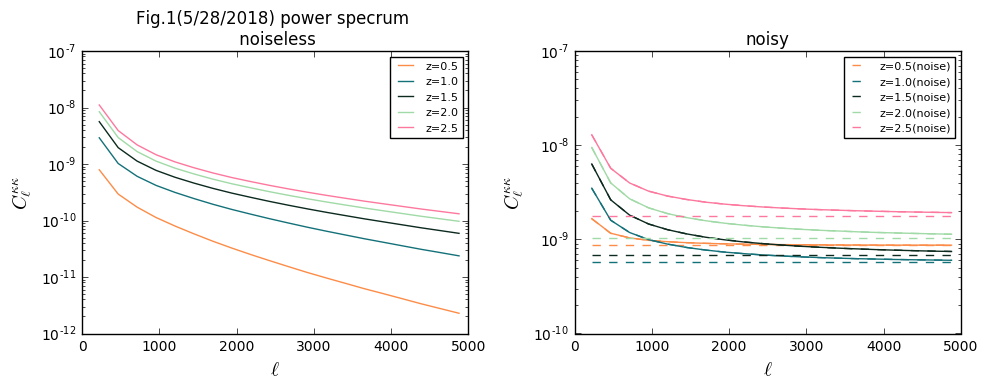

In [49]:
seed(45)
f, axes = subplots (1, 2, figsize=(10,4))
for i in range(5):
    icolor=rand(3)
    axes[0].plot(ell, psI[i,1],color=icolor,label='z=%s'%(z_arr[i]))
    axes[1].plot(ell, psN[i,1],color=icolor)#,label='z=%s'%(z_arr[i]))
    axes[1].plot(ell, ones(20)*Clnn[i],'--',color=icolor,label='z=%s(noise)'%(z_arr[i]))
    axes[1].plot(ell, psI[i,1]+Clnn[i],'--',color=icolor)
axes[0].set_title('Fig.1(5/28/2018) power specrum \n noiseless')
axes[1].set_title('noisy')
for ax in axes:
    ax.set_yscale('log')
    ax.set_xlabel('$\ell$',fontsize=14)
    ax.set_ylabel('$C_\ell^{\kappa\kappa}$',fontsize=14)
    ax.legend(fontsize=8,loc='best')
plt.tight_layout()
show()

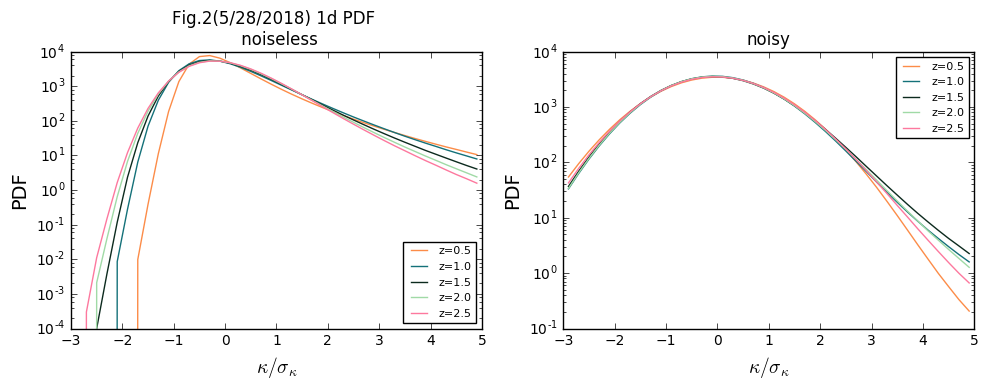

In [50]:
seed(45)
f, axes = subplots (1, 2, figsize=(10,4))
for i in range(5):
    icolor=rand(3)
    axes[0].plot(kcenter_gal, pdf1dI[i,1],color=icolor,label='z=%s'%(z_arr[i]))
    axes[1].plot(kcenter_gal, pdf1dN[i,1],color=icolor,label='z=%s'%(z_arr[i]))
axes[0].set_title('Fig.2(5/28/2018) 1d PDF \n noiseless')
axes[1].set_title('noisy')
for ax in axes:
    ax.set_yscale('log')
    ax.set_xlabel(r'$\kappa/\sigma_\kappa$',fontsize=14)
    ax.set_ylabel('PDF',fontsize=14)
    ax.legend(fontsize=8,loc='best')
plt.tight_layout()
show()

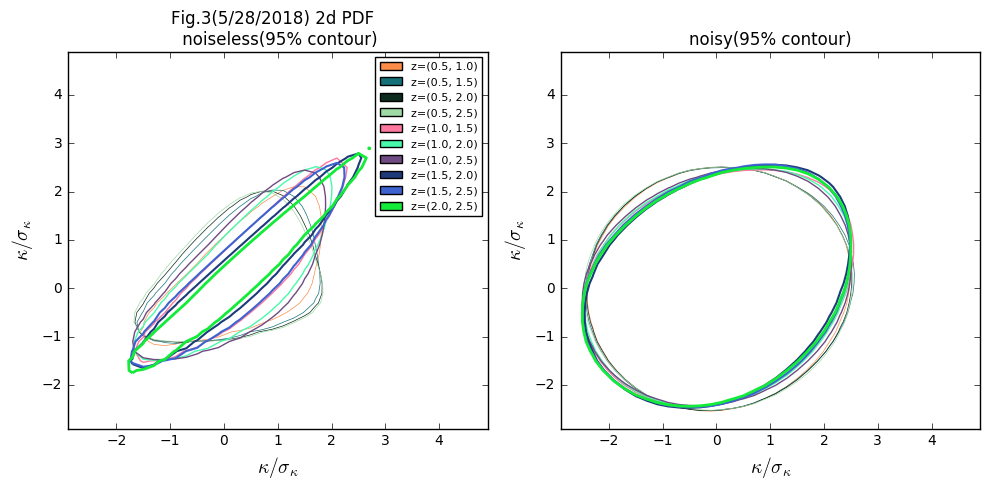

In [78]:
X, Y = meshgrid(kcenter_gal,kcenter_gal)
seed(45)
f, axes = subplots (1, 2, figsize=(10,5))
k=0
for i in range(5):
    for j in range(i+1,5):
        icolor=rand(3)  
        ilev0=WLanalysis.findlevel(pdf2dI[i,1])
        ilev1=WLanalysis.findlevel(pdf2dN[i,1])
        axes[0].contour(X, Y, pdf2dI[k,1], levels=[ilev0[1],], colors=[icolor,], linewidths=[i/2.0+0.5,])
        axes[1].contour(X, Y, pdf2dN[k,1], levels=[ilev1[1],], colors=[icolor,], linewidths=[i/2.0+0.5,])
        k+=1
seed(45)
proxy=[plt.Rectangle((0,0),1,1,ec=None, fc=rand(3)) for _i_ in range(10)]
ilabels=['z=(%.1f, %.1f)'%(z_arr[i],z_arr[j]) for i in range(5) for j in range(i+1,5)]
axes[0].legend(proxy, ilabels,loc='best',fontsize=8,ncol=1)
axes[0].set_title('Fig.3(5/28/2018) 2d PDF  \n noiseless(95% contour)')
axes[1].set_title('noisy(95% contour)')
for ax in axes:
    ax.set_xlabel(r'$\kappa/\sigma_\kappa$',fontsize=14)
    ax.set_ylabel(r'$\kappa/\sigma_\kappa$',fontsize=14)
plt.tight_layout()
show()

In [79]:
########## next test fisher contour from power spectrum

from matplotlib.patches import Ellipse

def plotEllipse(pos,P,edge,ls,ilabel,ax):
    '''plot the contour for covariance p
    where position is the center position
    p is the covariance [2,2] matirx'''
    U, s, Vh = svd(P) 
    orient = math.atan2(U[1,0],U[0,0])*180/pi
    ellipsePlot = Ellipse(xy=pos, width=2.0*math.sqrt(s[0]), 
                          height=2.0*math.sqrt(s[1]), angle=orient,edgecolor=edge, fill = 0, label=ilabel,ls=ls,linewidth=1)
    ax.add_patch(ellipsePlot)
    return ellipsePlot

def Fisher(covI, der, ir = 0.1, Nf=1e4, Na=1e4):
    '''
    Input: 
    covariance inverse matrix (Nbin, Nbin)
    derivatives (Nparams, Nbin), where Nparams is the number of parameters 
    skyscaling = area_sims / area_actual_survey = 12.25/2e4 for our sim and LSST
    Return the Fisher matrix
    '''
    Nparams, Nbin = der.shape
    F = zeros( shape= (Nparams, Nparams))
    for i in range(Nparams):
        for j in range(Nparams):
            dA, dB = der[i], der[j]
            Mij = mat(dA).T*mat(dB) + mat(dB).T*mat(dA)  
            F [i,j]= 0.5*trace(covI*Mij)
    Ferr = real(sqrt(mat(F).I)) [range(Nparams), range(Nparams)]
    return F, Ferr

In [93]:
########### build covariance matrix
ebcov_dir = 'box5/output_eb_5000_s4/seed0/'
psI_cov = swapaxes(array( [load(ebcov_dir+'ALL_igalXigal_z{0}_z{0}.npy'.format(iz)) for iz in z_arr]),0,1).reshape(10000,-1)
psN_cov = swapaxes(array( [load(ebcov_dir+'ALL_galXgal_z{0}_z{0}.npy'.format(iz)) for iz in z_arr]),0,1).reshape(10000,-1)

covpsI = cov(psI_cov,rowvar=0)
covpsN = cov(psN_cov,rowvar=0)
print covpsI.shape, covpsN.shape
print psI_cov.shape, psN_cov.shape

(100, 100) (100, 100)
(10000, 100) (10000, 100)


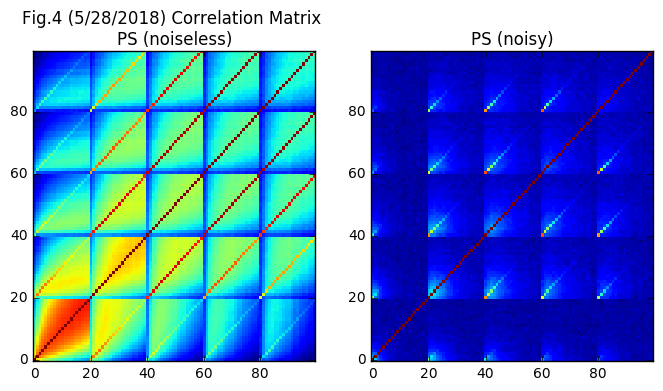

In [94]:
f, axes = subplots(1,2,figsize=(8,4))
axes[0].imshow(WLanalysis.corr_mat(covpsI), origin='lower',aspect='auto',interpolation='nearest')
axes[1].imshow(WLanalysis.corr_mat(covpsN), origin='lower',aspect='auto',interpolation='nearest')

axes[0].set_title('Fig.4 (5/28/2018) Correlation Matrix \nPS (noiseless)')
axes[1].set_title('PS (noisy)')
show()